In [5]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
dataframe =  pd.read_csv("Zomatodata.csv")


def Cleanvote(vote):
    Filtervote = str(vote).split("/")
    vote = Filtervote[0]
    return float(vote)
dataframe['rate']  = dataframe['rate'].apply(Cleanvote)

Text(0.5, 0, 'type of restorents')

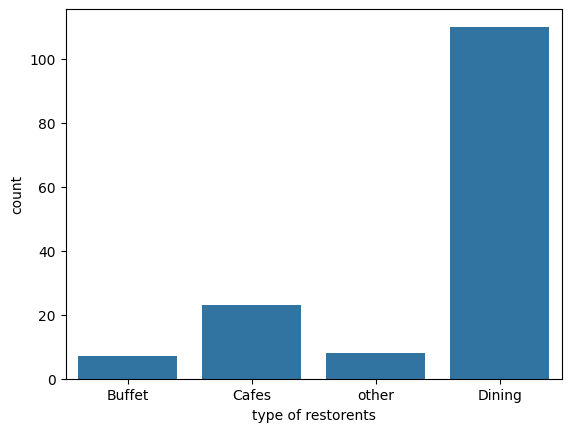

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restorents")

In [26]:
GroupedListings = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': GroupedListings})
print(result)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Votes')

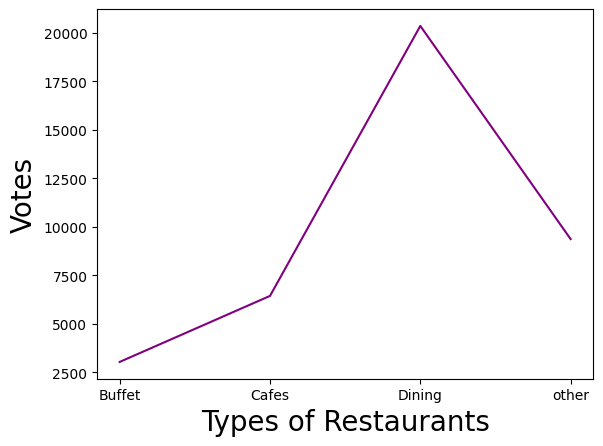

In [27]:
plt.plot(result, color="purple")
plt.xlabel("Types of Restaurants", size=20)
plt.ylabel("Votes", size= 20)

Conclusion -  Dining Restaurants are getting most of the Votes and Buffet Restaurants are getting lowest votes.

In [28]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Rating Distribution')

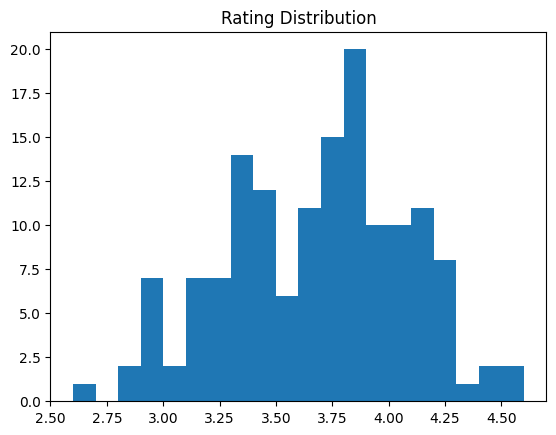

In [36]:
plt.hist(dataframe['rate'], bins=20)
plt.title('Rating Distribution')

In [37]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Average Order spending for two people

Average Order Value of 418.2432432432432
listed_in(type)
Buffet     4700
Cafes     12550
Dining    39300
other      5350
Name: approx_cost(for two people), dtype: int64


np.int64(148)

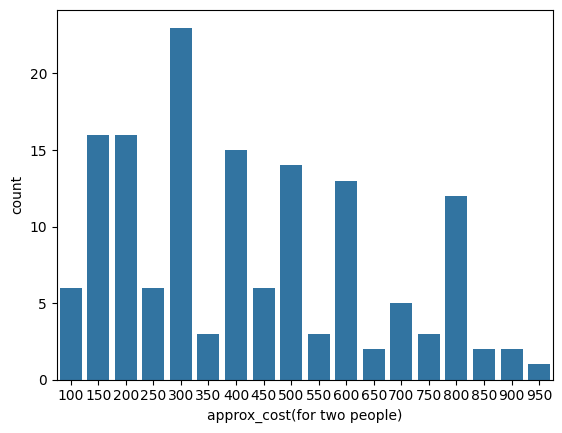

In [48]:
AverageOrderValue = dataframe['approx_cost(for two people)'].mean()
print(f'Average Order Value of {AverageOrderValue}')
sns.countplot(x=dataframe['approx_cost(for two people)'])

# To check Average is correct or not
GroupByOrders = dataframe.groupby('listed_in(type)')['approx_cost(for two people)'].sum()
print(GroupByOrders)
dataframe.name.count()

Conclusion -  Most of the couples prefers order value of 300 rupees most of the time and after that 150, 200, 400, 500 prefers order value are prefeable least of the time couples prefers 850, 900 and 950 rupees ordervalue. 

<Axes: xlabel='online_order', ylabel='rate'>

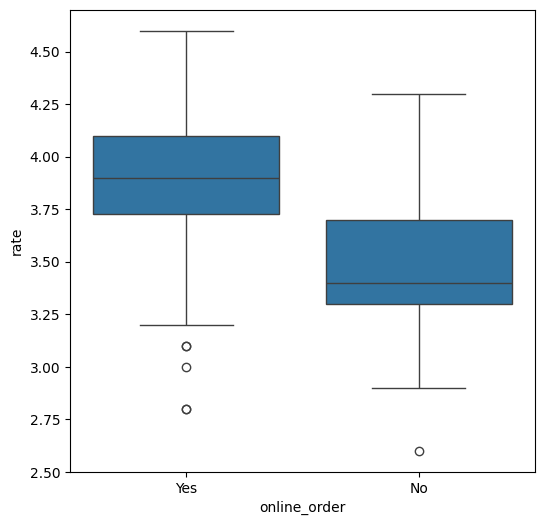

In [56]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y='rate', data = dataframe)

Conclusion - Offline order received lower rating in comaparison to online order.

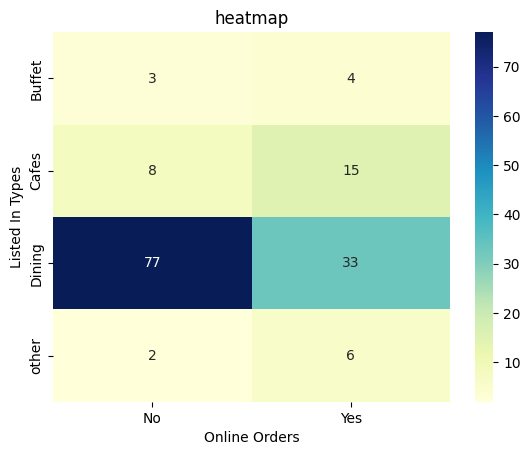

In [63]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot =True, cmap="YlGnBu", fmt='d')
plt.title('heatmap')
plt.xlabel("Online Orders")
plt.ylabel("Listed In Types")
plt.show()

Conclusion - Dining Restaurants primarily accept offline orders, whereas cafes primarly receive online orders. This suggests that clients prefers orders in person at restaurants, but prefer online ordering at cafes.